# Stochastic Processes : Price movements 

#### *Author : Hugo Michel*

### Import libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Let's define parameters

In [2]:
# Parameters
S0 = 100  # Initial stock price
mu = 0.1  # Drift
sigma = 0.2  # Volatility
lamb = 0.2  # Jump intensity parameter
alpha = 0.3  # Jump size parameter
T = 10  # Time period
N = 10000  # Number of time steps
dt = T / N  # Time step size

### Wiener process (Brownian Motion)
Brownian motion is the random motion of particles in a gas or liquid. This random motion is caused by the collision of the particles with the atoms or molecules in the liquid or gas. 

The relationship between Brownian Motion and financial markets are found by Louis Bachelier in his book The Theory of Speculation. This paper was the first to propose the use of Brownian Motion to evaluate stock options. The paper did not surface until later works in deriving the famous Black Scholes options pricing formula developed by Fisher Black and Myron Scholes in 1973. In the context of stochastic processes used in finance, Brownian Motion is often described as a Wiener process, described by the following properties,

1. $W_0 = 0$ (at time $t=0$)
2. The function $t \rightarrow W_t$ is continuous (Brownian motion has continuous paths, meaning that the particle’s position changes continuously over time)
3. $W_t$ had independent normaly dstributed increments: $\delta W_t = W_t - W_s \sim N(0, t-s)$

Consider the increase $W$ over a relatively long period $T$. It can be written $W(T)-W(0)$. It can be decomposed into the sum of the increments of $W$ in $N$ small intervals of length $\Delta_t$ where:

$$N = T/\Delta_t$$ then $$ W(T) - W(0) = \sum_{i=1}^{N} \epsilon_i \sqrt{\Delta_t}$$ (change in interval $\Delta t$)

where $\epsilon \sim N(0,1) => W(t) - W(0)$ follows a normal distribution

Hence:
* $E[W(T) - W(0)] = 0$ 
* $var(W(T) - W(0)) = n \cdot \Delta t = T  => std(W(T) - W(0)) = std(W(T)) = \sqrt{T} $

When $\Delta_t \rightarrow 0$ the movement is more agitated, more eradicating

If the interval $[s_i, t_i]$ $\forall  0<s<t$ are nonverlapping, the random variable $W(t_i) - W(s_i)$ exhibit mutual independance. This leads directly to the assertion that Brownian motion is a Markov process, signifying that the future movement after time t solely depends on the position at t and is unrelated to the historical path before t

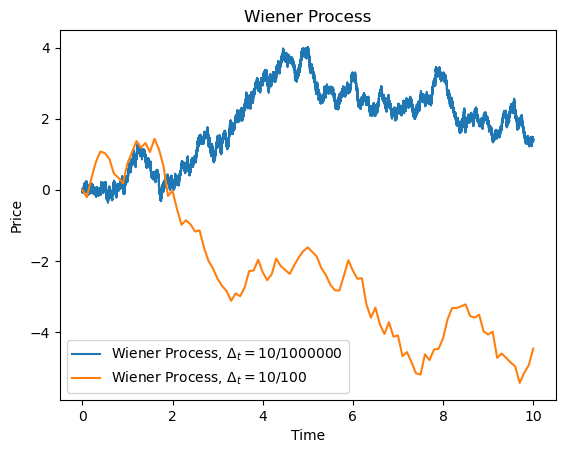

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Wiener Process (Brownian Motion)
def wiener_process(T, N):
    t = np.linspace(0, T, N+1)
    W = np.zeros(N+1)
    W[0] = 0
    for j in range(1, N+1):
        dW = np.sqrt(T / N) * np.random.normal()  # Wiener increment
        W[j] = W[j-1] + dW
    return t, W

N = 1000000
t_wp, W_wp = wiener_process(T, N)
plt.plot(t_wp, W_wp, label='Wiener Process, $\Delta_t = ' + str(int(T))+'/'+str(N)+"$")

N = 100
t_wp, W_wp = wiener_process(T, N)
plt.plot(t_wp, W_wp, label='Wiener Process, $\Delta_t = ' + str(int(T))+'/'+str(N)+"$")

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Wiener Process')
plt.legend()
plt.show()

When $\Delta_t \rightarrow 0$ the movement is more agitated, more eradicating

### Geometric Brownian Motion (GBM) VS. Exponential Growth model

#### 1. Exponential Growth Model

Before to dive into the Geometric Brownian Motion, let's introduce the exponential growth model.

We can define a deterministic differential equation to characterise the evolution of a process:

$$dS(t) = \mu S(t)dt$$

A solution to this equation is: $S_t = S_0 e^{\mu t}$ which is a constant exponential growth rate.

#### 2. GBM

Geometric Brownian Motion (GBM) was popularized by Black and Scholes when they used it in their 1973 paper, The Pricing of Options and Corporate Liabilities, to derive the Black Scholes equation. 

It is a exponential growth model with a stochastic term.

To put it simply, Geometric Brownian Motion is essentially Brownian Motion with a drift component and volatility (stochastic) component. The stochastic differential equation which describes the evolution of a Geometric Brownian Motion stochastic process is,

We have the SDE of $$S(t) : dS(t) = \mu S(t)dt + \sigma S(t) dB(t)$$

with

* $\mu S(t) dt$ is the drift term
* $\sigma S(t) dB(t)$ is the stochastique term
* $dS(t)$ is the change in asset price $S$
* $\sigma$ is the volatility

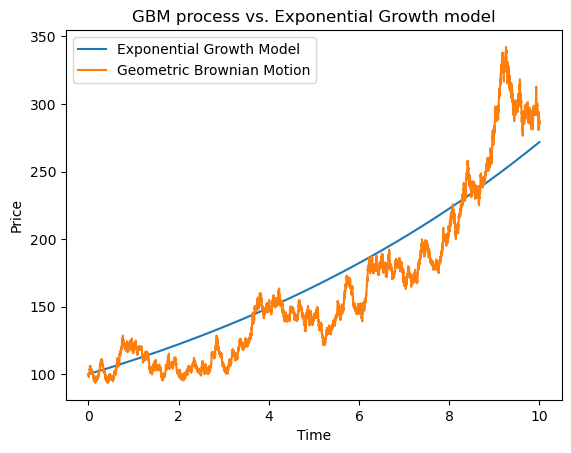

In [59]:
N = 10000
# Geometric Brownian Motion
def geometric_brownian_motion(S0, mu, sigma, T, N, dt):
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)  # Standard Brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)  # Geometric Brownian motion
    return t, S

# Exponential Growth Model
def exponential_growth_model(S0, mu, T, N):
    t = np.linspace(0, T, N)
    dt = T / N
    S = np.zeros(N)
    S[0] = S0
    for i in range(1, N):
        dS = mu * S[i-1] * dt
        S[i] = S[i-1] + dS
    return t, S


# Generate price movements
t_gb, S_gb = geometric_brownian_motion(S0, mu, sigma, T, N, dt)

t_exp, S_exp = exponential_growth_model(S0, mu, T, N)

plt.plot(t_exp, S_exp, label='Exponential Growth Model')
plt.plot(t_gb, S_gb, label='Geometric Brownian Motion')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('GBM process vs. Exponential Growth model')
plt.legend()
plt.show()

As we can see the exponential growth model fit not too bad on the Geometric Brownian Motion

### Jump diffusion model
It founds out that in fact the GBM doesn't reflect the stock price movement in the real life because GBM assume continuous and smooth price movements. However, financial markets often experience sudden and discontinuous movements, known as jumps, due to unexpected events or news. The jump diffusion model accounts for these abrupt changes due to various factors such as earnings announcement or unexpected events in asset prices. The jump diffusion model introduces a more realistic representation of market dynamics by acknowledging the presence of jumps.

That's why, Merton extended the original Geometric Brownian Motion process with a Jump Diffusion process in his 1976 paper, Option pricing when underlying stock returns are discontinuous.

$$
dS_t = \mu S_t dt + \sigma S_t dW_t + dJ_t 
$$

where :

* $dJ_t$ is the jump component

$dJ_t = S_t d\sum_{i=0}^{N_t}(Y_i-1)$

where:

* $N_t$ is the poisson procees with rate $\lambda$ and $Y_i$ is a random varialbe which follows a log-normal distribution


Poisson distribution:

$P(N(t) = n) = \frac{{(\lambda t)^n}}{{n!}} e^{-\lambda t}$

* $N(t)$ is the number of events that have occured up to time $t$
* $n$ is the number of events observed
* $\lambda$ is the average rate of event occurence (also known as the intensity parameter)

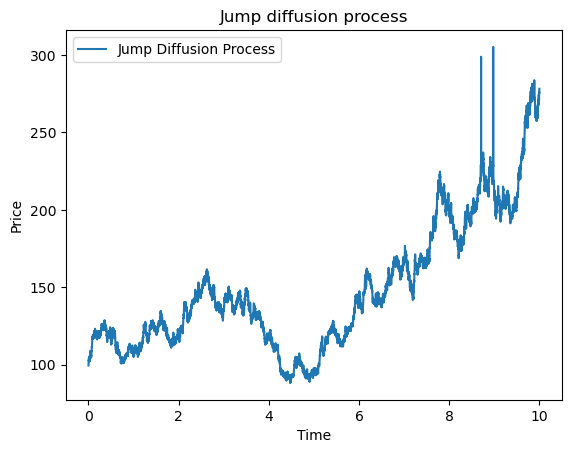

In [62]:
# Jump Diffusion Process
def jump_diffusion(S0, mu, sigma, lamb, alpha, T, N, dt):
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)  # Standard Brownian motion
    Pois = np.random.poisson(lamb * dt, N) # lambda define the frequency of at which jumps occur in the process 
    jumps = np.exp(alpha * Pois) # alpha is the size of the jumps (i.e the magnitude of the jump)
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X) * jumps
    return t, S


t_jd, S_jd = jump_diffusion(S0, mu, sigma, lamb, alpha, T, N, dt)
plt.plot(t_jd, S_jd, label='Jump Diffusion Process')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Jump diffusion process')
plt.legend()
plt.show()

### Wiener process VS. GBM VS. Jump diffusion process

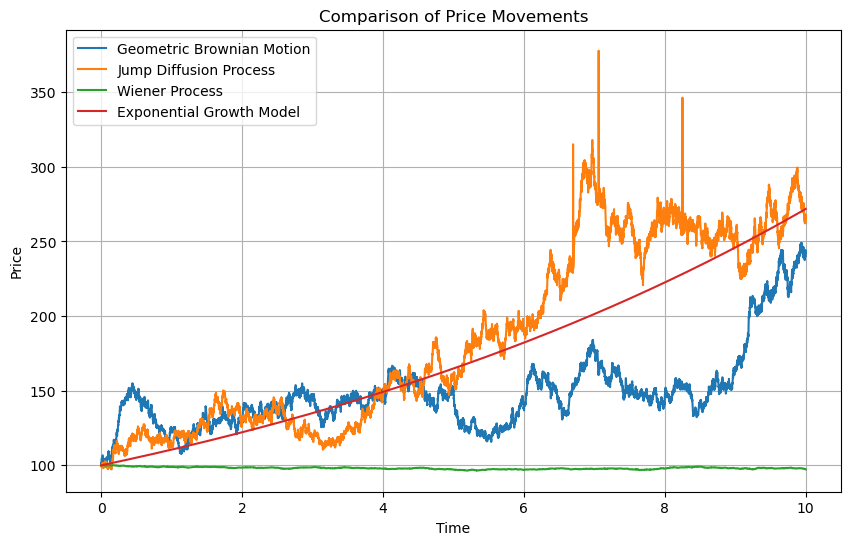

In [12]:
# Generate price movements
t_gb, S_gb = geometric_brownian_motion(S0, mu, sigma, T, N, dt)
t_jd, S_jd = jump_diffusion(S0, mu, sigma, lamb, alpha, T, N, dt)
t_wp, W_wp = wiener_process(S0, T, N)
t_exp, S_exp = exponential_growth_model(S0, mu, T, N)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_gb, S_gb, label='Geometric Brownian Motion')
plt.plot(t_jd, S_jd, label='Jump Diffusion Process')
plt.plot(t_wp, W_wp, label='Wiener Process')
plt.plot(t_exp, S_exp, label='Exponential Growth Model')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Comparison of Price Movements')
plt.legend()
plt.grid(True)
plt.show()